In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
recent_grads = pd.read_csv("recent-grads.csv")

In [18]:
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [20]:
raw_data_count = len(recent_grads.Rank)
raw_data_count

173

In [21]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.Rank)
cleaned_data_count

172

Generate scatter plots in separate jupyter notebook cells to explore the following relations:

+ Sample_size and Median
+ Sample_size and Unemployment_rate
+ Full_time and Median
+ ShareWomen and Unemployment_rate
+ Men and Median
+ Women and Median

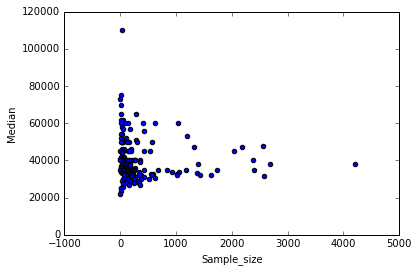

In [27]:
recent_grads.plot(x='Sample_size', y='Median', \
                       kind='scatter');

Most of the sample sizes are small and we can see there is no correlation between the number of people surveyed and the median income of a major.
We'll see a pretty similar plot for sample size vs unemployment rate below.

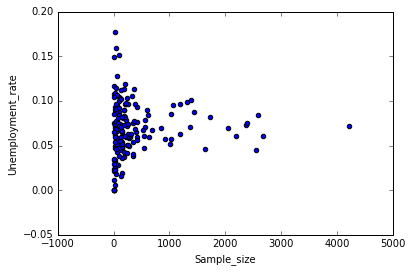

In [10]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', \
                       kind='scatter');

In [11]:
recent_grads[recent_grads["Unemployment_rate"] > 0.14]["Major"]

5                             NUCLEAR ENGINEERING
84     COMPUTER NETWORKING AND TELECOMMUNICATIONS
89                          PUBLIC ADMINISTRATION
170                           CLINICAL PSYCHOLOGY
Name: Major, dtype: object

It's difficult to see any trend here before of how massive some of full time employment numbers are.

It might be easier to see what's going on if we split the data.

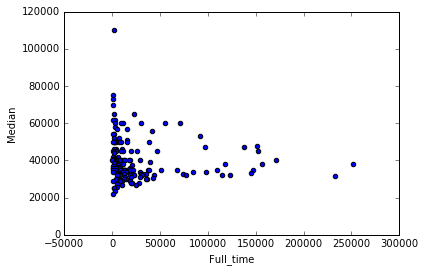

In [8]:
recent_grads.plot(x='Full_time', y='Median', \
                       kind='scatter');

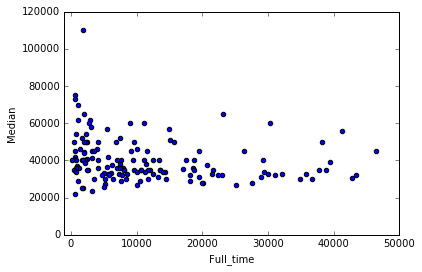

In [33]:
recent_grads[recent_grads.Full_time < 50000].plot(x='Full_time', y='Median', \
                       kind='scatter')
plt.xlim(-1000,50000);

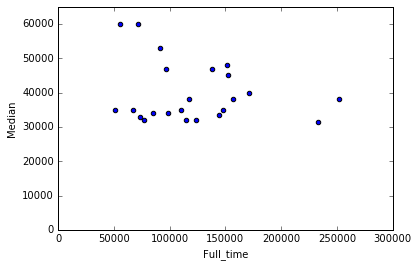

In [34]:
recent_grads[recent_grads.Full_time > 50000].plot(x='Full_time', y='Median', \
                       kind='scatter')

plt.ylim(0,65000);

We can see that the number of people employed doesn't have a major impact on the median salary. Some of the highest median incomes can be found ith major that have small numbers of full time employees, meaning it might be a more specialized job resulting in higher earnings. 

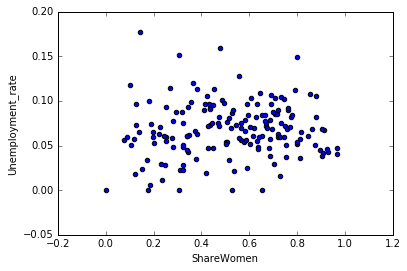

In [9]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', \
                       kind='scatter');

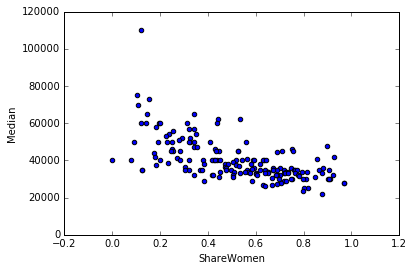

In [43]:
recent_grads.plot(x='ShareWomen', y='Median', \
                       kind='scatter');

There is a slight trend above showing that the more women in a major, the less the median income of the major, this makes sense as women in society in general make less than men.

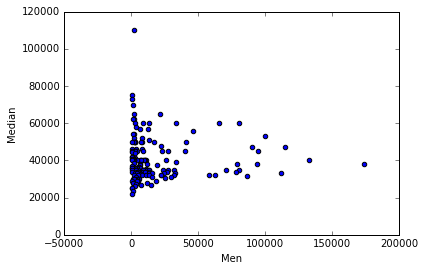

In [10]:
recent_grads.plot(x='Men', y='Median', \
                       kind='scatter');

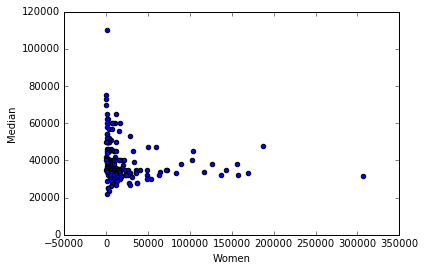

In [11]:
recent_grads.plot(x='Women', y='Median', \
                       kind='scatter');

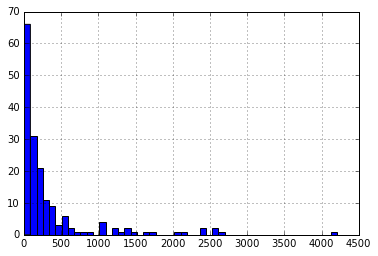

In [35]:
recent_grads["Sample_size"].hist(bins = 50);

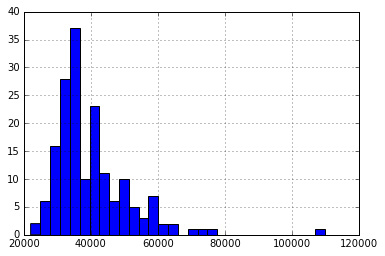

In [36]:
recent_grads["Median"].hist(bins = 30);

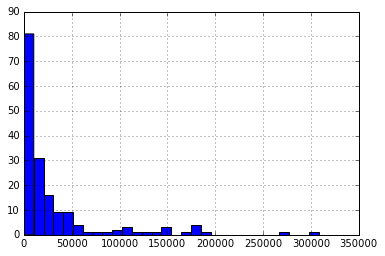

In [37]:
recent_grads["Employed"].hist(bins = 30);

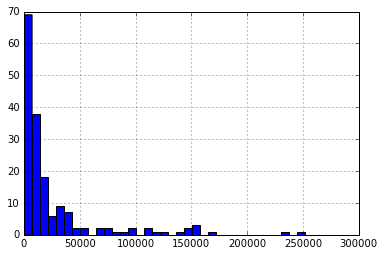

In [38]:
recent_grads["Full_time"].hist(bins = 35);

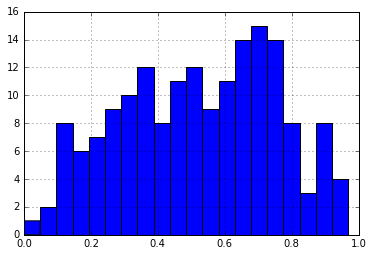

In [39]:
recent_grads["ShareWomen"].hist(bins = 20);

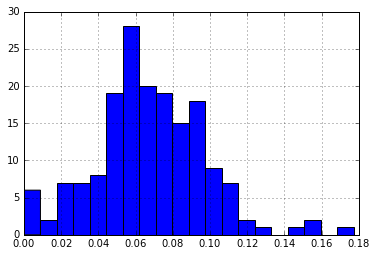

In [40]:
recent_grads["Unemployment_rate"].hist(bins = 20);

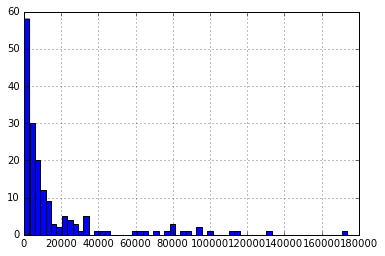

In [41]:
recent_grads["Men"].hist(bins = 60);

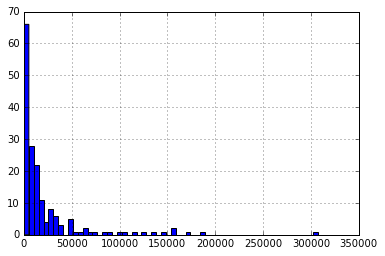

In [42]:
recent_grads["Women"].hist(bins = 60);

In [25]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa6728d5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa670eab00>]], dtype=object)

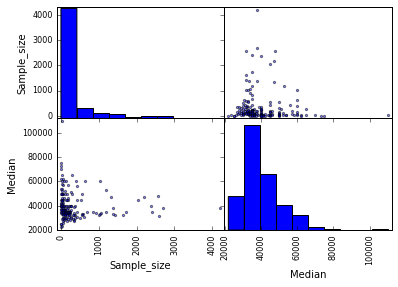

In [26]:
scatter_matrix(recent_grads[["Sample_size", "Median"]]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa67096a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa66dfb048>]], dtype=object)

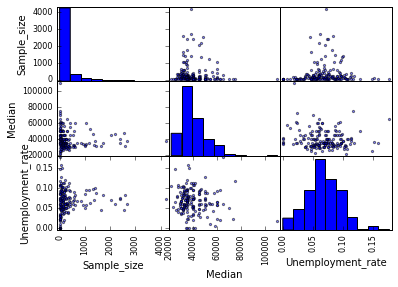

In [27]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

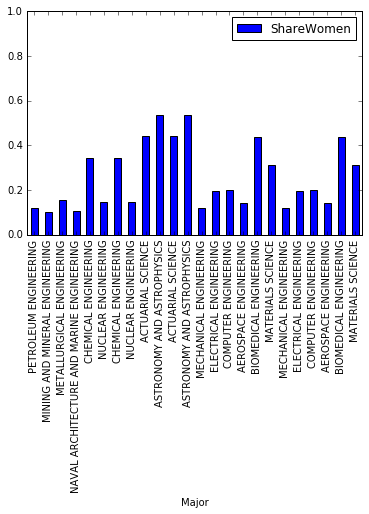

In [51]:
recent_grads.nlargest(10, columns = 'Median').plot.bar(x='Major', 
                                                       y='ShareWomen')
plt.ylim(0,1.0);

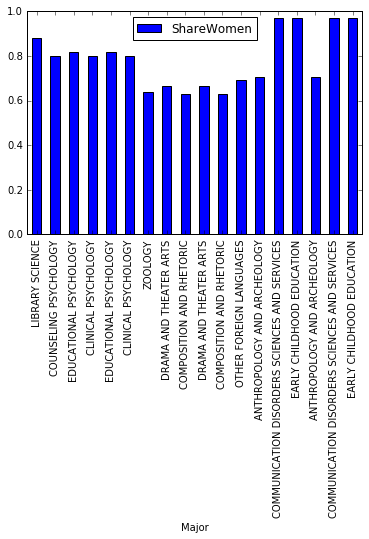

In [52]:
recent_grads.nsmallest(10, columns = 'Median').plot.bar(x='Major', 
                                                        y='ShareWomen')
plt.ylim(0,1.0);

We can see a split in the two bar charts above, the share of women in a major is **much** higher for the 10 lowest median income majors when compared to the 10 highest.

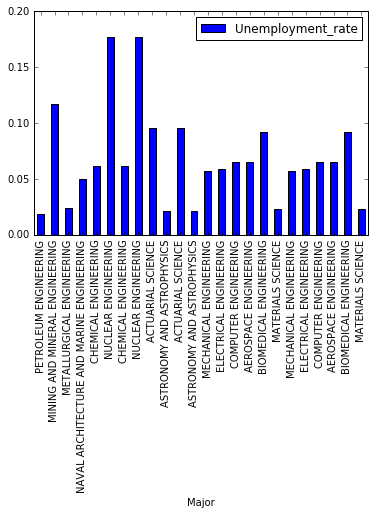

In [53]:
recent_grads.nlargest(10, columns = 'Median').plot.bar(x='Major', 
                                                       y='Unemployment_rate')
plt.ylim(0,0.20);

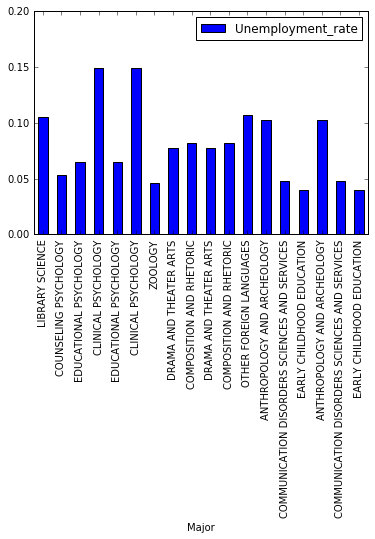

In [54]:
recent_grads.nsmallest(10, columns = 'Median').plot.bar(x='Major', 
                                                        y='Unemployment_rate')
plt.ylim(0,0.20);

There isn't much different in the lowest vs highest median income majors when we look at the unemployment rate. The highest rates are in the higher income majors, but overall the range is pretty similar, we can see that the lower income majors tend to, on average, have a higher rate of unemployment, we can look at the means for each group to check. 

In [55]:
recent_grads.nlargest(10, columns = 'Median')['Unemployment_rate'].mean()

0.068523307458333335

In [56]:
recent_grads.nsmallest(10, columns = 'Median')['Unemployment_rate'].mean()

0.07999171766666667

The mean rate is slightly higher for the lower income major by a little over a percent.

In [63]:
men_major_cat = recent_grads.groupby('Major_category').sum()['Men']
women_major_cat = recent_grads.groupby('Major_category').sum()['Women']

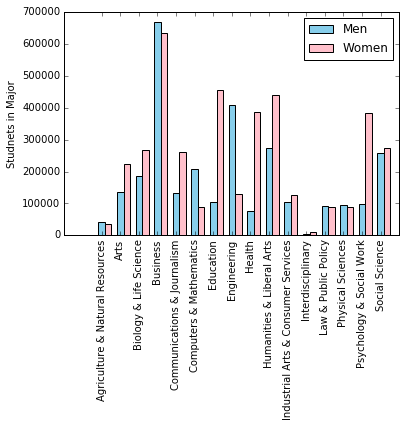

In [104]:
ind = np.arange(len(men_major_cat))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_major_cat.values, width,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_major_cat.values, width,
                color='Pink', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Studnets in Major')
ax.set_xticks(ind)
ax.set_xticklabels(men_major_cat.index, rotation=90)
ax.legend();

The majors with less total students, tend to have more equal split between the genders (Agriculture, Law, Physical Sciens), Business also come fairly close to an even split.

We see some of the biggest splits in Education (many more women) and Engineering (many more men).

A box plot may not be the best way to visualize income, but we can see that the mean is a little below $40,000.

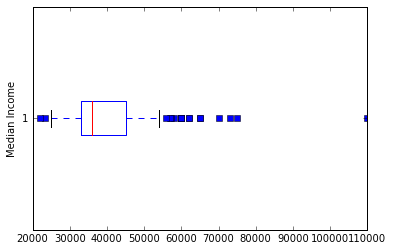

In [107]:
plt.boxplot(recent_grads.Median, 0, 'rs', 0, 0.75)
plt.ylabel('Median Income');

In the box plot below we can see that unemployment rates are pretty spread out among the majors.

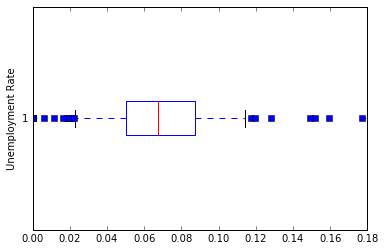

In [97]:
plt.boxplot(recent_grads.Unemployment_rate, 0, 'rs', 0, 0.75)
plt.ylabel('Unemployment Rate');

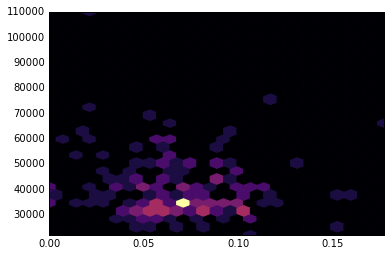

In [101]:
plt.hexbin(recent_grads.Unemployment_rate, 
           recent_grads.Median, gridsize=25, cmap='inferno');

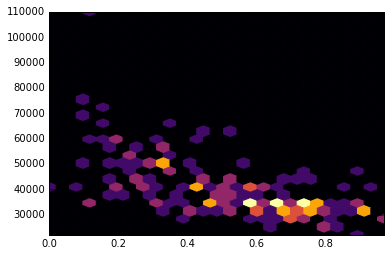

In [102]:
plt.hexbin(recent_grads.ShareWomen, 
           recent_grads.Median, gridsize=25, cmap='inferno');

The hexagonal bin plots match the distributions we saw in our scatter plot. They make dense data easier to understand by binning the data and using color intensity to indicate a higher concentration of a points.